In [2]:
import keras
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [5]:
url = 'https://raw.githubusercontent.com/vigneshk/Admission-Dataset/refs/heads/master/Admission.csv'

In [6]:
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
y = df['Chance of Admit ']
x = df.drop('Chance of Admit ',axis=1)

x_treino,y_treino = x[:300],y[:300]
x_teste,y_teste = x[300:],y[300:]

In [10]:
x_treino.shape

(300, 8)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

#criando rede neural
modelo = Sequential()
modelo.add(Dense(units=3, activation='relu', input_dim=x_treino.shape[1]))
modelo.add(Dense(units=1,activation='linear'))

#treinando rede neural
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=200 ,batch_size=32, validation_data=(x_teste, y_teste))


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2965.1316 - mae: 42.9715 - val_loss: 22982.6250 - val_mae: 149.4050
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1905.5463 - mae: 35.4490 - val_loss: 15901.2158 - val_mae: 123.6422
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1508.3364 - mae: 33.2391 - val_loss: 12052.9570 - val_mae: 107.1133
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1244.9768 - mae: 30.2225 - val_loss: 10380.0400 - val_mae: 99.1185
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1264.5645 - mae: 30.3192 - val_loss: 9920.9873 - val_mae: 96.8737
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1214.5552 - mae: 29.8297 - val_loss: 9646.8770 - val_mae: 95.5414
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1134.3594 - mae: 29.4494 - val_loss: 9340.3594 - val_mae: 94.0136
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 982.0836 - mae: 26.9471 - val_loss: 8588.0020 - val_mae: 9

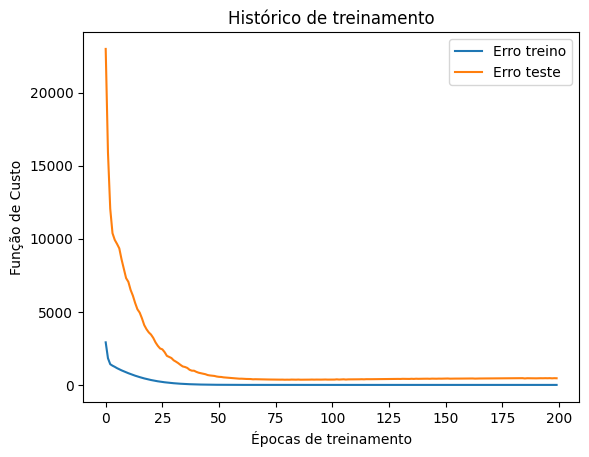

In [17]:
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de treinamento')
plt.ylabel('Função de Custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()